Week3 - Project3 - Churn Prediction for StreamWorks Media 

**Name: Bhoomi Sharma **
**Date: 03/10/2025 **

Objective: This Project analyze customer data from **Streamworks Media** inorder to:
Understand customer behaviour and usage Patterns.
Identify the key factors that drive **Churn**
Build a simple **predictive Model** to estimate the likelihood of churn.

In [3]:
# Improt libraries
# Basic data handling and plots
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Stats and ML
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    r2_score, mean_squared_error, mean_absolute_error
)

# Make pandas show more columns for convenience
pd.set_option("display.max_columns", 100)


## 2) Load the data

In [4]:

# Read the CSV into a DataFrame
csv_path = "streamworks_user_data.csv"
df = pd.read_csv(csv_path)

# Quick peek
print("Shape:", df.shape)
display(df.head(10))


Shape: (1500, 14)


,user_id,age,gender,signup_date,last_active_date,country,subscription_type,average_watch_hours,mobile_app_usage_pct,complaints_raised,received_promotions,referred_by_friend,is_churned,monthly_fee
0,1001.0,56.0,Other,02-04-25,13-07-25,France,Standard,42.6,77.4,1.0,No,No,1.0,10.99
1,1002.0,69.0,Male,02-01-23,13-07-25,India,Basic,65.3,98.0,4.0,No,Yes,1.0,5.99
2,1003.0,46.0,Male,21-08-22,13-07-25,UK,Premium,40.1,47.8,0.0,No,Yes,1.0,13.99
3,1004.0,32.0,Other,14-09-23,13-07-25,Germany,Premium,5.8,53.2,1.0,Yes,Yes,1.0,13.99
4,1005.0,60.0,Female,29-07-23,13-07-25,India,Standard,32.7,16.8,5.0,No,Yes,0.0,9.99
5,1006.0,25.0,Male,25-06-23,13-07-25,USA,Premium,40.0,24.7,1.0,No,Yes,0.0,13.99
6,1007.0,38.0,Male,15-02-23,13-07-25,UK,Premium,57.8,83.9,0.0,No,Yes,0.0,14.99
7,1008.0,56.0,Male,20-12-22,13-07-25,Germany,Premium,9.0,35.6,5.0,No,Yes,0.0,14.99
8,1009.0,36.0,Other,30-05-25,13-07-25,UK,Standard,11.6,82.7,1.0,No,Yes,0.0,NaN
9,1010.0,40.0,Male,07-11-24,13-07-25,France,Basic,21.5,70.9,5.0,Yes,Yes,0.0,6.99


## 3) Basic exploration

In [6]:

# Structure and summary
print("\n--- .info() ---")
print(df.info())

print("\n--- .describe() for numeric columns ---")
display(df.select_dtypes(include="number").describe())

print("\n--- Missing values per column ---")
display(df.isnull().sum())

# Value counts for a few important columns if they exist
for col in ["gender", "country", "subscription_type", "received_promotions", "referred_by_friend", "is_churned"]:
    if col in df.columns:
        print(f"\n--- value counts: {col} ---")
        print(df[col].value_counts(dropna=False))



--- .info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1498 non-null   float64
 1   age                   1497 non-null   float64
 2   gender                1499 non-null   object 
 3   signup_date           1498 non-null   object 
 4   last_active_date      1498 non-null   object 
 5   country               1497 non-null   object 
 6   subscription_type     1497 non-null   object 
 7   average_watch_hours   1496 non-null   float64
 8   mobile_app_usage_pct  1498 non-null   float64
 9   complaints_raised     1497 non-null   float64
 10  received_promotions   1497 non-null   object 
 11  referred_by_friend    1497 non-null   object 
 12  is_churned            1499 non-null   float64
 13  monthly_fee           1355 non-null   float64
dtypes: float64(7), object(7)
memory usage: 164.2+ KB
None



,user_id,age,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee
count,1498.000000,1497.000000,1496.000000,1498.000000,1497.000000,1499.000000,1355.000000
mean,1750.871829,43.738811,39.903342,51.414419,2.498330,0.234156,10.180406
std,433.060980,15.083920,22.978288,28.580117,1.706829,0.423612,3.310705
min,1001.000000,18.000000,0.500000,0.000000,0.000000,0.000000,5.990000
25%,1376.250000,31.000000,19.450000,27.100000,1.000000,0.000000,5.990000
50%,1750.500000,44.000000,40.300000,52.700000,2.000000,0.000000,9.990000
75%,2125.750000,56.000000,59.800000,76.200000,4.000000,0.000000,13.990000
max,2500.000000,69.000000,79.900000,100.000000,5.000000,1.000000,14.990000



--- Missing values per column ---


user_id                   2
age                       3
gender                    1
signup_date               2
last_active_date          2
country                   3
subscription_type         3
average_watch_hours       4
mobile_app_usage_pct      2
complaints_raised         3
received_promotions       3
referred_by_friend        3
is_churned                1
monthly_fee             145
dtype: int64


--- value counts: gender ---
Female    510
Other     506
Male      483
NaN         1
Name: gender, dtype: int64

--- value counts: country ---
Canada     262
India      259
France     254
Germany    246
UK         241
USA        235
NaN          3
Name: country, dtype: int64

--- value counts: subscription_type ---
Basic       505
Premium     499
Standard    493
NaN           3
Name: subscription_type, dtype: int64

--- value counts: received_promotions ---
No     763
Yes    734
NaN      3
Name: received_promotions, dtype: int64

--- value counts: referred_by_friend ---
Yes    752
No     745
NaN      3
Name: referred_by_friend, dtype: int64

--- value counts: is_churned ---
0.0    1148
1.0     351
NaN       1
Name: is_churned, dtype: int64


## 4) Correlation heatmap (numeric columns only)

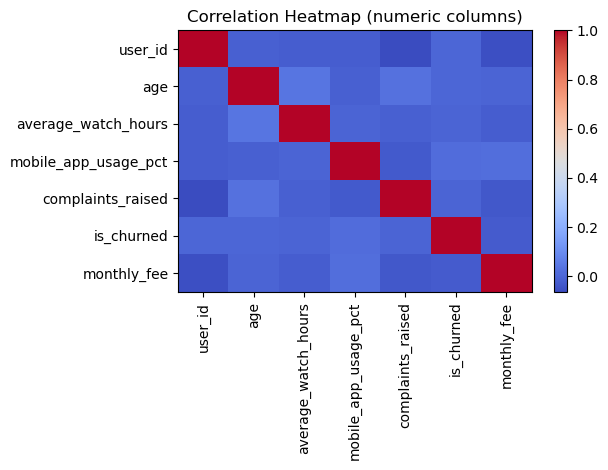

In [9]:

# Select numeric columns and compute correlation
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
corr = df[numeric_cols].corr()

# Plot correlation matrix using matplotlib (no seaborn)
plt.figure()
plt.imshow(corr, interpolation='nearest', aspect='auto', cmap="coolwarm")
plt.title("Correlation Heatmap (numeric columns)")
plt.colorbar()
plt.xticks(range(len(numeric_cols)), numeric_cols, rotation=90)
plt.yticks(range(len(numeric_cols)), numeric_cols)
plt.tight_layout()
plt.show()


## 5) Data cleaning and simple feature engineering

In [10]:

# Convert date columns to datetime if present
if "signup_date" in df.columns:
    df["signup_date"] = pd.to_datetime(df["signup_date"], errors="coerce")
if "last_active_date" in df.columns:
    df["last_active_date"] = pd.to_datetime(df["last_active_date"], errors="coerce")

# Create tenure_days (days between signup and last active)
if "signup_date" in df.columns and "last_active_date" in df.columns:
    df["tenure_days"] = (df["last_active_date"] - df["signup_date"]).dt.days
else:
    df["tenure_days"] = np.nan  # if dates are missing, keep placeholder

# is_loyal: True if tenure_days > 180
df["is_loyal"] = np.where(df["tenure_days"] > 180, 1, 0)

# watch_per_fee_ratio: average_watch_hours / monthly_fee
if "average_watch_hours" in df.columns and "monthly_fee" in df.columns:
    df["watch_per_fee_ratio"] = df["average_watch_hours"] / df["monthly_fee"]
else:
    df["watch_per_fee_ratio"] = np.nan

# heavy_mobile_user: True if mobile_app_usage_pct > 70
if "mobile_app_usage_pct" in df.columns:
    df["heavy_mobile_user"] = np.where(df["mobile_app_usage_pct"] > 70, 1, 0)
else:
    df["heavy_mobile_user"] = 0

# Simple missing value handling:
# - Numeric columns: fill with median
# - Object/category columns: fill with mode (most frequent)
for c in df.columns:
    if df[c].dtype.kind in "biufc":  # numeric types
        if df[c].isnull().any():
            df[c] = df[c].fillna(df[c].median())
    else:
        if df[c].isnull().any():
            df[c] = df[c].fillna(df[c].mode(dropna=True).iloc[0] if df[c].mode(dropna=True).size > 0 else "Unknown")

print("After cleaning, missing values per column:")
display(df.isnull().sum())


After cleaning, missing values per column:


user_id                 0
age                     0
gender                  0
signup_date             0
last_active_date        0
country                 0
subscription_type       0
average_watch_hours     0
mobile_app_usage_pct    0
complaints_raised       0
received_promotions     0
referred_by_friend      0
is_churned              0
monthly_fee             0
tenure_days             0
is_loyal                0
watch_per_fee_ratio     0
heavy_mobile_user       0
dtype: int64

## 6) Encode categorical columns (one-hot/dummies)

In [11]:

# Identify object (string) columns to one-hot encode
cat_cols = df.select_dtypes(include=["object"]).columns.tolist()

# We will not include ID-like columns in encoding if present
for id_like in ["user_id"]:
    if id_like in cat_cols:
        cat_cols.remove(id_like)

# One-hot encode with drop_first=True to avoid dummy trap
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print("Original shape:", df.shape, "Encoded shape:", df_encoded.shape)
display(df_encoded.head())


Original shape: (1500, 18) Encoded shape: (1500, 24)


,user_id,age,signup_date,last_active_date,average_watch_hours,mobile_app_usage_pct,complaints_raised,is_churned,monthly_fee,tenure_days,is_loyal,watch_per_fee_ratio,heavy_mobile_user,gender_Male,gender_Other,country_France,country_Germany,country_India,country_UK,country_USA,subscription_type_Premium,subscription_type_Standard,received_promotions_Yes,referred_by_friend_Yes
0,1001.0,56.0,2025-02-04,2025-07-13,42.6,77.4,1.0,1.0,10.99,159.0,0,3.876251,1,0,1,1,0,0,0,0,0,1,0,0
1,1002.0,69.0,2023-02-01,2025-07-13,65.3,98.0,4.0,1.0,5.99,893.0,1,10.901503,1,1,0,0,0,1,0,0,0,0,0,1
2,1003.0,46.0,2022-08-21,2025-07-13,40.1,47.8,0.0,1.0,13.99,1057.0,1,2.866333,0,1,0,0,0,0,1,0,1,0,0,1
3,1004.0,32.0,2023-09-14,2025-07-13,5.8,53.2,1.0,1.0,13.99,668.0,1,0.414582,0,0,1,0,1,0,0,0,1,0,1,1
4,1005.0,60.0,2023-07-29,2025-07-13,32.7,16.8,5.0,0.0,9.99,715.0,1,3.273273,0,0,0,0,0,1,0,0,0,1,0,1


## 7) Statistical tests — chi-square and t-test (simple)

In [12]:

# Chi-square tests: is_churned vs a few categorical flags (if present)
chi_candidates = []
for col in ["gender", "received_promotions", "referred_by_friend"]:
    # Use the original df (not encoded) for readability
    if col in df.columns and "is_churned" in df.columns:
        chi_candidates.append(col)

for col in chi_candidates:
    contingency = pd.crosstab(df[col], df["is_churned"])
    chi2, p, dof, expected = stats.chi2_contingency(contingency)
    print(f"Chi-square test — {col} vs is_churned: chi2={chi2:.2f}, p-value={p:.4f}")
    display(contingency)

# t-test: compare average_watch_hours between churned (1) vs retained (0) if present
if "average_watch_hours" in df.columns and "is_churned" in df.columns:
    group1 = df.loc[df["is_churned"] == 1, "average_watch_hours"].dropna()
    group0 = df.loc[df["is_churned"] == 0, "average_watch_hours"].dropna()
    if len(group1) > 1 and len(group0) > 1:
        t_stat, p_val = stats.ttest_ind(group1, group0, equal_var=False)  # Welch's t-test
        print(f"t-test — average_watch_hours (churned vs retained): t={t_stat:.2f}, p-value={p_val:.4f}")
    else:
        print("Not enough data to run the t-test on average_watch_hours.")


Chi-square test — gender vs is_churned: chi2=4.47, p-value=0.1071


is_churned,0.0,1.0
gender,,
Female,375,136
Male,378,105
Other,396,110


Chi-square test — received_promotions vs is_churned: chi2=2.62, p-value=0.1058


is_churned,0.0,1.0
received_promotions,,
No,573,193
Yes,576,158


Chi-square test — referred_by_friend vs is_churned: chi2=0.76, p-value=0.3818


is_churned,0.0,1.0
referred_by_friend,,
No,563,182
Yes,586,169


t-test — average_watch_hours (churned vs retained): t=-0.19, p-value=0.8527


## 8) Simple charts to compare churned vs active users

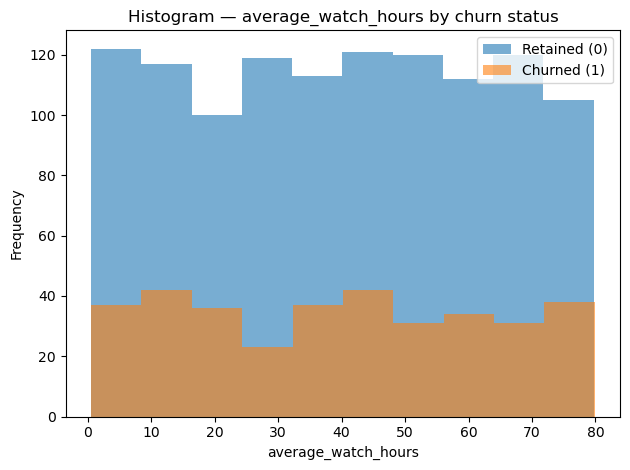

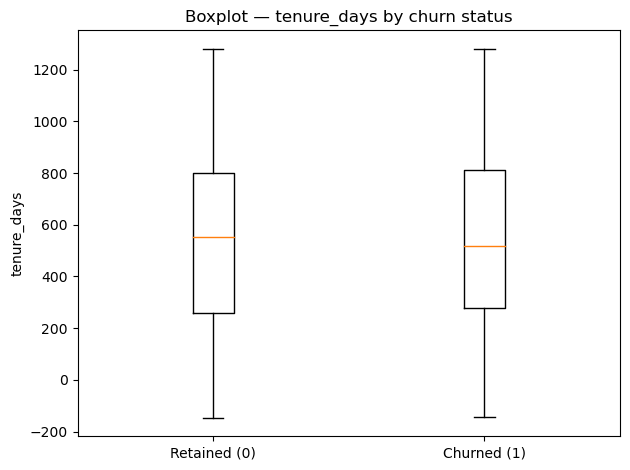

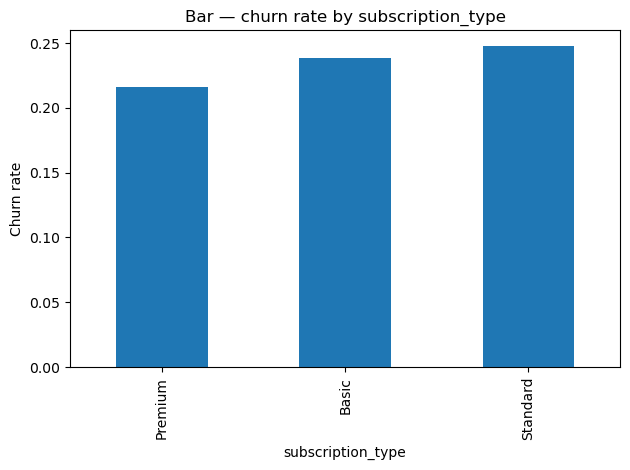

In [13]:

# Histogram: average_watch_hours by churn status
if "average_watch_hours" in df.columns and "is_churned" in df.columns:
    plt.figure()
    df[df["is_churned"]==0]["average_watch_hours"].plot(kind="hist", alpha=0.6)
    df[df["is_churned"]==1]["average_watch_hours"].plot(kind="hist", alpha=0.6)
    plt.title("Histogram — average_watch_hours by churn status")
    plt.xlabel("average_watch_hours")
    plt.legend(["Retained (0)", "Churned (1)"])
    plt.tight_layout()
    plt.show()

# Boxplot: tenure_days by churn
if "tenure_days" in df.columns and "is_churned" in df.columns:
    plt.figure()
    data_to_plot = [df[df["is_churned"]==0]["tenure_days"], df[df["is_churned"]==1]["tenure_days"]]
    plt.boxplot(data_to_plot, labels=["Retained (0)", "Churned (1)"])
    plt.title("Boxplot — tenure_days by churn status")
    plt.ylabel("tenure_days")
    plt.tight_layout()
    plt.show()

# Bar chart: churn rate by subscription_type (if available)
if "subscription_type" in df.columns and "is_churned" in df.columns:
    churn_rate = df.groupby("subscription_type")["is_churned"].mean().sort_values()
    plt.figure()
    churn_rate.plot(kind="bar")
    plt.title("Bar — churn rate by subscription_type")
    plt.ylabel("Churn rate")
    plt.tight_layout()
    plt.show()


## 9) Logistic Regression — predict `is_churned`

Final feature set shape: (1500, 20)

--- Confusion Matrix ---
[[120 110]
 [ 41  29]]

--- Classification Report ---
              precision    recall  f1-score   support

           0      0.745     0.522     0.614       230
           1      0.209     0.414     0.278        70

    accuracy                          0.497       300
   macro avg      0.477     0.468     0.446       300
weighted avg      0.620     0.497     0.535       300

ROC AUC: 0.471


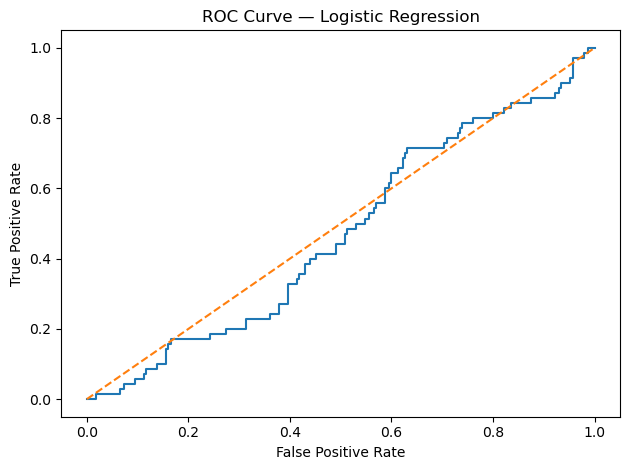


Top 10 Positive Coefficients (increase churn probability):


average_watch_hours           0.204955
is_loyal                      0.150097
country_India                 0.115446
country_UK                    0.101805
mobile_app_usage_pct          0.089307
country_France                0.083483
country_Germany               0.082901
country_USA                   0.058960
age                          -0.000308
subscription_type_Standard   -0.006291
dtype: float64


Top 10 Negative Coefficients (decrease churn probability):


watch_per_fee_ratio         -0.246699
received_promotions_Yes     -0.183977
gender_Other                -0.143323
gender_Male                 -0.117677
monthly_fee                 -0.117252
heavy_mobile_user           -0.096060
tenure_days                 -0.061903
subscription_type_Premium   -0.057068
referred_by_friend_Yes      -0.053107
complaints_raised           -0.043980
dtype: float64

In [15]:

# Prepare features (X) and target (y)
if "is_churned" in df_encoded.columns:
    y = df_encoded["is_churned"].astype(int)
    X = df_encoded.drop(columns=["is_churned"])
else:
    # If the encoded column name differs (rare), try to find it
    target_guess = [c for c in df_encoded.columns if c.endswith("is_churned")]
    if target_guess:
        y = df_encoded[target_guess[0]].astype(int)
        X = df_encoded.drop(columns=[target_guess[0]])
    else:
        raise ValueError("Target column 'is_churned' not found in the dataset.")
        
# ✅ FIX: drop datetime + ID columns before scaling
dt_cols = X.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns.tolist()
X = X.drop(columns=dt_cols)

for col in ["user_id"]:
    if col in X.columns:
        X = X.drop(columns=[col])

non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric:
    X = X.drop(columns=non_numeric)

print("Final feature set shape:", X.shape)


# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features (fit on train, transform on both)
scaler = StandardScaler(with_mean=False)  # with_mean=False to handle sparse-like dummies safely
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train logistic regression (balanced to help with class imbalance if any)
logreg = LogisticRegression(max_iter=1000, class_weight="balanced", solver="liblinear")
logreg.fit(X_train_scaled, y_train)

# Predictions
y_pred = logreg.predict(X_test_scaled)
y_proba = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("\n--- Confusion Matrix ---")
print(confusion_matrix(y_test, y_pred))

print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred, digits=3))

auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC: {auc:.3f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], linestyle="--")
plt.title("ROC Curve — Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.show()

# Show top coefficients (most positive/negative) for interpretation
coef_series = pd.Series(logreg.coef_[0], index=X.columns)
top_positive = coef_series.sort_values(ascending=False).head(10)
top_negative = coef_series.sort_values(ascending=True).head(10)

print("\nTop 10 Positive Coefficients (increase churn probability):")
display(top_positive)

print("\nTop 10 Negative Coefficients (decrease churn probability):")
display(top_negative)


## 10) Linear Regression — predict `average_watch_hours`

R²: 0.820, RMSE: 9.808, MAE: 7.388


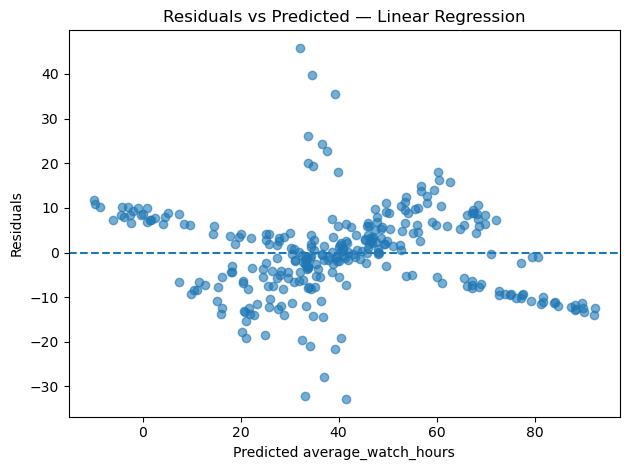


Top 10 features by absolute coefficient (influence):


watch_per_fee_ratio           23.377066
monthly_fee                   11.293584
subscription_type_Standard     2.557284
tenure_days                   -1.115436
is_loyal                       0.648137
country_Germany                0.600989
country_UK                     0.523622
mobile_app_usage_pct          -0.512894
age                            0.454385
country_USA                    0.433983
dtype: float64

In [17]:

# We try to predict average_watch_hours using user features.
# Remove rows with missing target (if any)
if "average_watch_hours" not in df.columns:
    print("average_watch_hours is not in the dataset — skipping linear regression.")
else:
    df_lr = df_encoded.copy()
    y_lr = df["average_watch_hours"].astype(float)
    X_lr = df_lr.drop(columns=[c for c in df_lr.columns if c == "average_watch_hours"])

    # Align X and y to avoid misalignment issues
    mask = y_lr.notna()
    y_lr = y_lr[mask]
    X_lr = X_lr.loc[mask]
    
 # ✅ Drop datetime and ID columns from features
    dt_cols_lr = X_lr.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns.tolist()
    X_lr = X_lr.drop(columns=dt_cols_lr, errors="ignore")

    for col in ["user_id"]:
        if col in X_lr.columns:
            X_lr = X_lr.drop(columns=[col])

    non_numeric_lr = X_lr.select_dtypes(exclude=[np.number]).columns.tolist()
    if non_numeric_lr:
        X_lr = X_lr.drop(columns=non_numeric_lr)

    X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

    scaler_lr = StandardScaler(with_mean=False)
    X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
    X_test_lr_scaled = scaler_lr.transform(X_test_lr)

    linreg = LinearRegression()
    linreg.fit(X_train_lr_scaled, y_train_lr)

    y_pred_lr = linreg.predict(X_test_lr_scaled)

    r2 = r2_score(y_test_lr, y_pred_lr)
    rmse = mean_squared_error(y_test_lr, y_pred_lr, squared=False)
    mae = mean_absolute_error(y_test_lr, y_pred_lr)

    print(f"R²: {r2:.3f}, RMSE: {rmse:.3f}, MAE: {mae:.3f}")

    # Residual plot (predicted vs actual and residuals)
    residuals = y_test_lr - y_pred_lr

    plt.figure()
    plt.scatter(y_pred_lr, residuals, alpha=0.6)
    plt.axhline(0, linestyle="--")
    plt.title("Residuals vs Predicted — Linear Regression")
    plt.xlabel("Predicted average_watch_hours")
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()

    # Show top absolute coefficients for interpretation
    coef_lr = pd.Series(linreg.coef_, index=X_lr.columns)
    top_abs = coef_lr.abs().sort_values(ascending=False).head(10).index
    print("\nTop 10 features by absolute coefficient (influence):")
    display(coef_lr.loc[top_abs].sort_values(key=np.abs, ascending=False))
